# Linear Regression

It is a statistical model which estimates the **linear relationship** between a **target** (scalar response) and one or more **input variables**. 

**Types of Linear Regression:**

1. **Simple Linear Regression** involves one independent variable.

2. While **Multiple Linear Regression** involves more than one.

3. **Polynomial Regression** extends linear regression by considering polynomial relationships between variables by capturing non-linear patterns in the data.

## **Simple Linear Regression**:

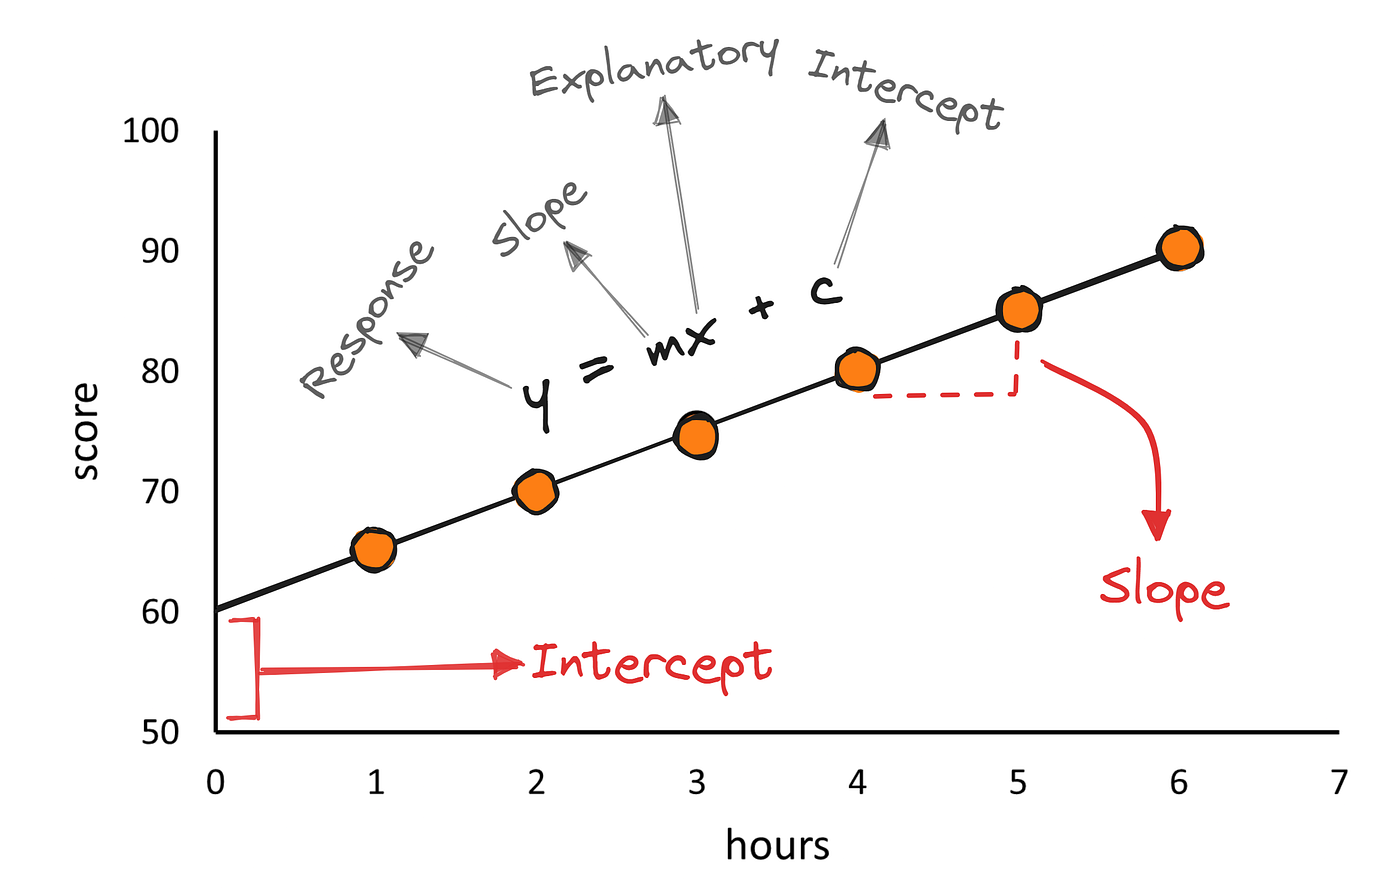

In Simple Linear Regression, we have two variables:

-- **Independent Variable/ Predictor / Input Variable (X)**:

This variable is used to predict the value of the dependent variable.

-- **Dependent Variable/ Response / Output variable (Y)**:

This is the variable we want to predict.


The relationship between X and Y is modeled as a straight line:

`Y=mX+b`

where:

* Y is the dependent variable (what we want to predict),
* X is the independent variable,
* m is the slope of the line (how much 
* Y changes with each unit change in (X),
* b is the y-intercept (the value of Y when X is 0).

## Creating Dataset

Creating a Dataset with One Input and One Target Column using sklearn's `make_regression` class for applying **Simple Linear Regression** Class.

In [36]:
from sklearn.datasets import make_regression


In [62]:
input_,target_ = make_regression(n_samples=500, n_features=1, n_informative=3, n_targets=1, noise=20)


## Plotting the dataset

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'target')

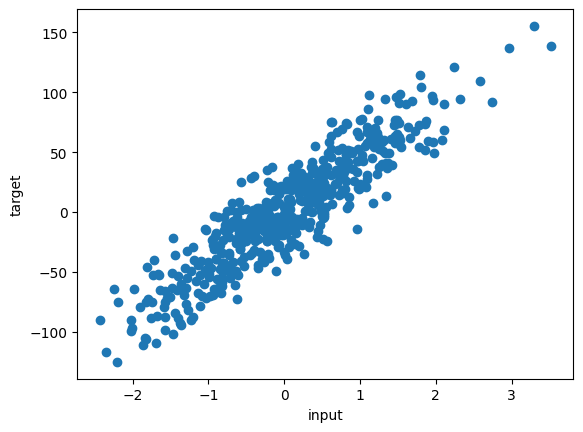

In [63]:
plt.scatter(input_,target_)
plt.xlabel('input')
plt.ylabel('target')

## Splitting data into train and test datasets

In [11]:
from sklearn.model_selection import train_test_split

In [64]:
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

In [65]:
train_input.shape

(400, 1)

In [66]:
test_input.shape

(100, 1)

In [67]:
train_target.shape

(400,)

## Building our own **Simple Linear Regression** Class.

In [91]:
class SimpleLinearRegression:
    
    # Creating an initializor
    def __init__(self):
        self.m = None
        self.b = None
        
        
    # Creating 'fit' Function
    def fit(self, train_input, test_input):
        
        # Calculating slope of the line (m):
        numerator = 0
        denominator = 0
        
        for i in range(train_input.shape[0]):
            
            numerator = numerator + ((train_input[i] - train_input.mean()) * (train_target[i] - train_target.mean()))
            denominator = denominator + ((train_input[i] - train_input.mean()) * (train_input[i] - train_input.mean()))
            
        self.m = numerator/denominator
        
        # Calculating coefficent of the line(b):
        self.b = train_target.mean() - (self.m * train_input.mean())
        
    @property
    def coefficients(self):
        if self.m is not None:
            return self.m
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.b is not None:
            return self.b
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_input):
        return self.m * test_input + self.b
    

In [70]:
train_input.shape[0]

400

In [92]:
slr = SimpleLinearRegression()

In [93]:
slr.fit(train_input, train_target)

In [112]:
slr_pred = slr.predict(test_input)

In [95]:
slr.coefficients

array([43.44732032])

In [96]:
slr.intercept

array([0.56700561])

## Validation Results: Using sklearn's **LinearRegression** class  

In [97]:
from sklearn.linear_model import LinearRegression


In [98]:
lr = LinearRegression()


In [99]:
lr.fit(train_input, train_target)


LinearRegression()

In [103]:
lr.coef_

array([43.44732032])

In [104]:
lr.intercept_

0.5670056086028308

**sklearn LinearRegression** is giving exactly same as our made **SimpleLinearRregression** Class.

## Plotting the Regression Line

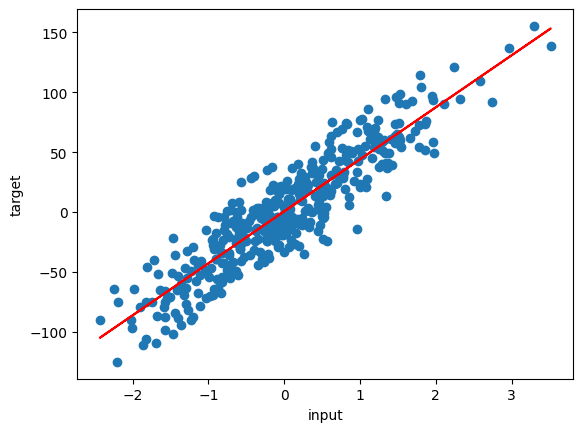

In [109]:
plt.scatter(train_input, train_target)
plt.plot(train_input,lr.predict(train_input),color='red')
plt.xlabel('input')
plt.ylabel('target')
plt.show()

In [114]:
lr_pred = lr.predict(test_input)

## Checking Regression Metrics 

Regression metrics are used to evaluate the performance of regression models, which predict continuous numerical values. Scikit-analyze provides several metrics, each with its own strengths and boundaries, to assess how well a model suits the statistics.

***Note: We will compare our model result with sklearn's metrics.***

### Types of Regression Metrics

Some common regression metrics in scikit-learn with examples

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared (R²) Score
* Adjusted R-squared (R²) Score

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Mean Absolute Error (MAE):

It is the average of the absolute differences between the predicted and actual values.

Formula: 

Where:

* xi represents the actual or observed values for the i-th data point.
* yi represents the predicted value for the i-th data point.

In [115]:
print("LR MAE",mean_absolute_error(test_target,lr_pred))
print("SLR MAE",mean_absolute_error(test_target,slr_pred))


LR MAE 16.544520539567298
SLR MAE 16.544520539567298


## Mean Squared Error (MSE):

It is the average of the squared differences between the predicted and actual values.

Formula:  

Where:

* xi represents the actual or observed value for the i-th data point.
* yi represents the predicted value for the i-th data point.

In [116]:
print("LR MSE",mean_squared_error(test_target,lr_pred))
print("SLR MSE",mean_squared_error(test_target,slr_pred))

LR MSE 416.40820543796923
SLR MSE 416.4082054379692


## Root Mean Squared Error (RMSE):

It is the square root of the MSE and provides the error in the same units as the target variable.

Formula: 

Where:

* xi represents the actual or observed value for the i-th data point.
* yi represents the predicted value for the i-th data point.

In [117]:
import numpy as np

In [118]:
print("LR RMSE",np.sqrt(mean_squared_error(test_target,lr_pred)))
print("SLR RMSE",np.sqrt(mean_squared_error(test_target,slr_pred)))


LR RMSE 20.406082559814593
SLR RMSE 20.40608255981459


## R-squared (R2):

It measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

Formula: 

Where:

* R2 is the R-Squared.
* SSR represents the sum of squared residuals between the predicted values and actual values.
* SST represents the total sum of squares, which measures the total variance in the dependent variable.

Ranges from 0 to 1, where 1 indicates a perfect fit.

In [121]:
print("LR R2",r2_score(test_target,lr_pred))

print("SLR R2",r2_score(test_target,slr_pred))

LR R2 0.8085900589912272
SLR R2 0.8085900589912273


In [120]:
lr_r2 = r2_score(test_target,lr_pred)
slr_r2 = r2_score(test_target,slr_pred)

## Adjusted R2 score

Similar to R-squared but penalizes for adding irrelevant features to the model.

Adjusts the R-squared value based on the number of predictors.

-- Useful in multiple linear regression.

In [124]:
print("LR Adjusted R2 score", 1 - ((1-lr_r2)*(100-1)/(100-1-1)))
print("SLR Adjusted R2 score", 1 - ((1-slr_r2)*(100-1)/(100-1-1)))

LR Adjusted R2 score 0.8066368963278723
SLR Adjusted R2 score 0.8066368963278725


Yay, we got same results.

These metrics help in assessing how well a regression model performs in terms of accuracy and precision in predicting continuous outcomes. 

**Remember**: The choice of metric depends on the specific characteristics and requirements of the problem at hand.

Stay tuned for *Multiple Linear Regression* and Don't forget to ***Star*** this Github Repository for more such contents.